### Обидина Ксения Александровна гр. М20-ЯЭ

#### Лабораторная работа №2. Предварительная обработка данных

##### Вариант 6

##### Индекс счастья

 Задание
1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.
2. Постройте график счастья по регионам, страны на графике должны представляться отдельными точками.
3. Оцените количество счастья по годам по регионам.
4. Определите наиболее сильно изменяющиеся параметры по разным странам в разные годы.
5. Определите страны, появляющиеся и исчезающие в рейтинге стран.
6. Удалите строки с пропущенными значениями. Выведите размер набора данных до и после удаления.
7. Вычислите корреляцию Пирсона и Спирмена между признаками Trust.Government.Corruption и Family. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.
8. Добавьте в набор данных признак, являющийся суммой двух других признаков.


##### Описание значений используемых полей (признаков) в исследуемом наборе данных:

Country - страна;  
Region - регион;  
Happiness Rank - рейтинг счастья;  
Happiness Score - показатель счастья;  
Standard Error - стандартная погрешность;  
Economy (GDP per Capita) - экономика (ВВП на душу населения);  
Family - семья;  
Health (Life Expectancy) - здоровье (продолжительность жизни);  
Freedom - свобода;  
Trust (Government Corruption) - доверие (коррупция в правительстве);  
Generosity - щедрость;  
Dystopia Residual - остаточная антиутопия.

In [3]:
import pandas as pd
import seaborn as sns
import scipy
%pylab inline
from pylab import rcParams

df15 = pd.read_csv("2015.csv")
df16 = pd.read_csv("2016.csv")
df17 = pd.read_csv("2017.csv")

df17 = df17.rename(columns = {'Happiness.Rank' : 'Happiness Rank'})
df17 = df17.rename(columns = {'Happiness.Score' : 'Happiness Score'})
df17 = df17.rename(columns = {'Happiness.Rank' : 'Happiness Rank'})
df17 = df17.rename(columns = {'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)'})
df17 = df17.rename(columns = {'Health..Life.Expectancy.' : 'Health (Life Expectancy)'})
df17 = df17.rename(columns = {'Trust..Government.Corruption.' : 'Trust (Government Corruption)'})
df17 = df17.rename(columns = {'Dystopia.Residual' : 'Dystopia Residual'})

Populating the interactive namespace from numpy and matplotlib


In [4]:
df15

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
df16

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789


In [6]:
df17

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...,...,...,...,...
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


##### 1. Визуализируйте корреляции между признаками, находящимися в наборе данных (heatmap). Сделайте выводы.

<AxesSubplot:>

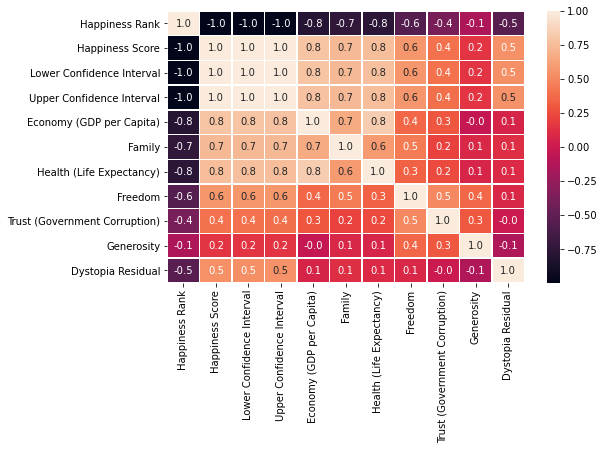

In [7]:
rcParams['figure.figsize'] = 8, 5
sns.heatmap(df16.corr(), annot = True, fmt = '.1f', linewidths = .5)

##### Вывод: 
В 2016 году Happines Score, Lower Confidence Interval и Upper Confidence Interval полностью коррелируют между собой. Happiness Rank имеет минимальное значение корреляции.

#####  2.Постройте график счастья по регионам, страны на графике должны представляться отдельными точками.

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

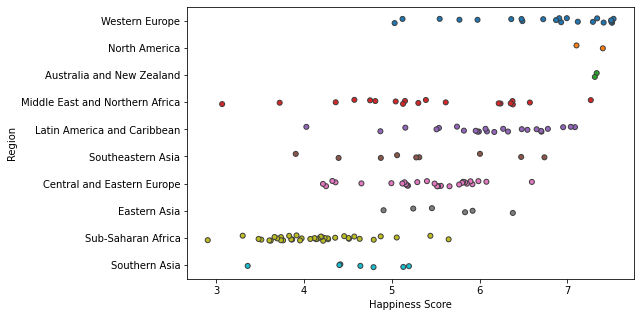

In [8]:
rcParams['figure.figsize'] = 8, 5
sns.stripplot(x = "Happiness Score", y = "Region", data = df16, linewidth = 1)

##### 3. Оцените количество счастья по годам по регионам.

<AxesSubplot:xlabel='Happiness Score', ylabel='Region'>

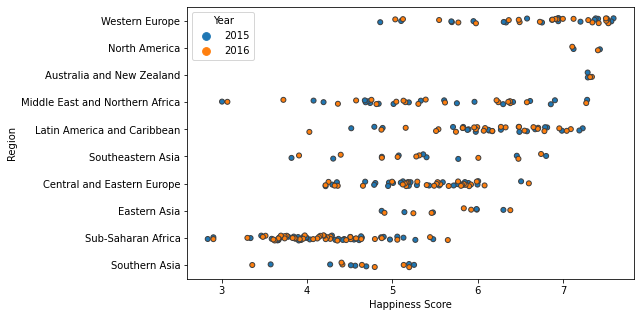

In [9]:
rcParams['figure.figsize'] = 8, 5
df15['Year'] = "2015"
df16['Year'] = "2016"

df = pd.concat([df15, df16])
sns.stripplot(x = "Happiness Score", y = "Region", hue = "Year", data = df, linewidth = 1)

##### 4. Определите наиболее сильно изменяющиеся параметры по разным странам в разные годы.

In [10]:
df15['Year'] = "2015"
df16['Year'] = "2016"
df17['Year'] = "2017"

df = pd.concat([df15, df16, df17])
df = df.drop(['Happiness Rank'], axis = 'columns')
df.groupby('Year').mean()

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
Year,,,,,,,,,,,,,
2015,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977,NaN,NaN,NaN,NaN
2016,5.382185,NaN,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807,5.282395,5.481975,NaN,NaN
2017,5.354019,NaN,0.984718,1.188898,0.551341,0.408786,0.123120,0.246883,1.850238,NaN,NaN,5.452326,5.255713


##### 5. Определите страны, появляющиеся и исчезающие в рейтинге стран.

In [11]:
df1 = pd.concat([df15, df16])
df2 = pd.concat([df15, df17])
df3 = pd.concat([df16, df17])
df1 = df1['Country'].drop_duplicates(keep = False)
df2 = df2['Country'].drop_duplicates(keep = False)
df3 = df3['Country'].drop_duplicates(keep = False)
df = pd.concat([df1, df2, df3])
df.drop_duplicates()

21                         Oman
90            Somaliland region
93                   Mozambique
96                      Lesotho
100                   Swaziland
125                    Djibouti
147    Central African Republic
14                  Puerto Rico
51                       Belize
75                      Somalia
96            Somaliland Region
112                     Namibia
142                 South Sudan
37                       Taiwan
39                     Suriname
71                    Hong Kong
98                         Laos
139                     Comoros
32     Taiwan Province of China
70      Hong Kong S.A.R., China
Name: Country, dtype: object

##### 6. Удалите строки с пропущенными значениями. Выведите размер набора данных до и после удаления.

In [12]:
print("До удаления:", df16.shape)
df = df16.dropna()
print("После удаления:", df.shape)

До удаления: (157, 14)
После удаления: (157, 14)


##### 7. Вычислите корреляцию Пирсона и Спирмена между признаками Trust.Government.Corruption и Family. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.

In [13]:
x = df16['Trust (Government Corruption)']
y = df16['Family']

pearson = scipy.stats.pearsonr(x, y)
spearman = scipy.stats.spearmanr(x, y)

print("Корреляция Пирсона:", pearson)
if pearson[1] < 0.05:
    print('Нормальное значение p-value')
else:
    print('Ненормальное значение p-value')
    
print("Корреляция Спирмена:", spearman)
if spearman[1] < 0.05:
    print('Нормальное значение p-value')
else:
    print('Ненормальное значение p-value')

Корреляция Пирсона: (0.21356093757197214, 0.007240342953719788)
Нормальное значение p-value
Корреляция Спирмена: SpearmanrResult(correlation=0.177294402482085, pvalue=0.026325994511410922)
Нормальное значение p-value


<AxesSubplot:>

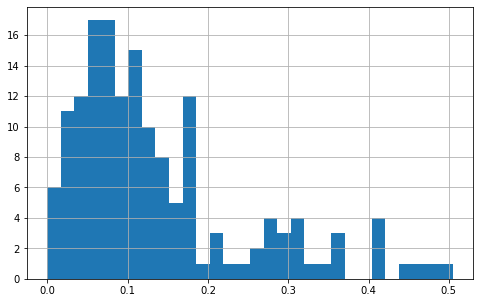

In [14]:
x.hist(bins = 30)

<AxesSubplot:>

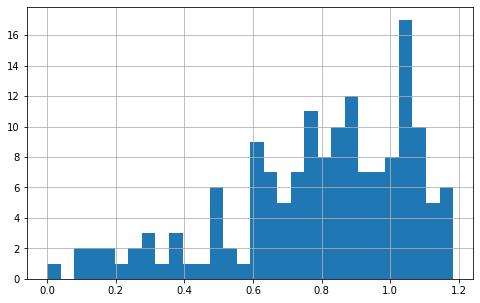

In [15]:
y.hist(bins = 30)

##### 8. Добавьте в набор данных признак, являющийся суммой двух других признаков.

In [16]:
df16['Sum'] = df16['Family'] + df16['Freedom']
df16

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year,Sum
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016,1.74315
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016,1.73081
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016,1.74950
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016,1.72299
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016,1.70568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016,0.50166
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016,0.27467
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016,0.34678
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789,2016,0.21778
